<a href="https://colab.research.google.com/github/abaah17/Machine_Learning/blob/main/ML_Telco_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of your work is to develop a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn. Perfom the following operations as you create the much needed machine learning application.

Using the given dataset extract the relevant features that can define a customer churn. [5]

Using relevant mapping features show areas where customers churn a lot.       [10]

 Using the features in (i) define and train an Extreme Gradient Boosting “XGBOOST” model .        [10]

Evaluate the model’s accuracy and calculate the AUC value.  [5]

Create a platform to host the model either web-based or desktop application.           [20]'

Allow users to use the application to enter new data and your model should predict if the supplied data of a new customer can result in a churn or not giving the confidence factor of  the model.        [10]

Using the given dataset extract the relevant features that can define a customer churn. [5]



In [ ]:
# Storing my dataset in a variable
dataset = "/content/drive/My Drive/Colab Notebooks/ML_Tatenda/Csv_Assignment_2 - datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [ ]:
# importing necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import pickle


In [ ]:
# Reading my dataset
df = pd.read_csv(dataset)
df.head()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.describe()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Checking if there are Null Values in my dataset
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Selected features 

selected_features = df.drop(['customerID','SeniorCitizen'], axis = 1)
selected_features

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Using relevant mapping features show areas where customers churn a lot. [10]



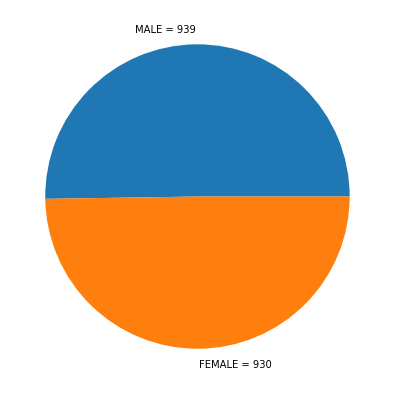

In [ ]:
# mapping features show areas where customers churn a lot

data = selected_features
data = data[data['Churn'] == 'Yes']

# Groupby
data_new = data.groupby(['gender'])['Churn'].count()
x = data_new['Female']
y = data_new['Male']

gender = ['MALE = 939','FEMALE = 930'] 

data = [x, y]
  
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = gender) 
# 
# show plot 
plt.show() 


In [ ]:
# Applying Extreme Gradient Boosting “XGBOOST” model .
# Data Prep

# We start by replacing the 11 missing values in the TotalCharges
selected_features['TotalCharges'].fillna(selected_features['TotalCharges'].mean(), inplace=True)

# checking if there is still null values in my dataset
selected_features.isnull().sum()

gender              0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Convert 'No internet service' to 'No' for the below mentioned columns
cols = ['OnlineBackup', 'StreamingMovies','DeviceProtection',
                'TechSupport','OnlineSecurity','StreamingTV']
for i in cols : 
    selected_features[i]  = selected_features[i].replace({'No internet service' : 'No'})

# Convert 'No phone service' to 'No' for the below mentioned column

selected_features['MultipleLines'] = selected_features['MultipleLines'].replace({'No phone service' : 'No'})

selected_features.head()    
    

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
selected_features.columns

cols =[
  'gender', 'Partner', 'Dependents', 'tenure', 'PhoneService',
  'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection',
  'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
  'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'
]

cols
for i in cols:
    selected_features[i] = pd.get_dummies(selected_features[i]) 

selected_features
selected_features.shape

(7043, 19)

In [ ]:
#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale
standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
#Apply the feature scaling operation on dataset using fit_transform() method
selected_features[columns_for_ft_scaling] = standardScaler.fit_transform(selected_features[columns_for_ft_scaling])

selected_features

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,-0.039551,1,1,1,1,0,1,1,1,1,1,0,0,-0.011917,-0.011917,1
1,0,1,1,-0.039551,0,1,1,0,1,0,1,1,1,0,1,0,-0.011917,-0.011917,1
2,0,1,1,-0.039551,0,1,1,0,0,1,1,1,1,1,0,0,-0.011917,-0.011917,0
3,0,1,1,-0.039551,1,1,1,0,1,0,0,1,1,0,1,1,-0.011917,-0.011917,1
4,1,1,1,-0.039551,0,1,0,1,1,1,1,1,1,1,0,0,-0.011917,-0.011917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,-0.039551,0,0,1,0,1,0,0,0,0,0,0,0,-0.011917,-0.011917,1
7039,1,0,0,-0.039551,0,0,0,1,0,0,1,0,0,0,0,0,-0.011917,-0.011917,1
7040,1,0,0,-0.039551,1,1,1,0,1,1,1,1,1,1,0,0,-0.011917,-0.011917,1
7041,0,0,1,-0.039551,0,0,0,1,1,1,1,1,1,1,0,0,-0.011917,-0.011917,0


In [ ]:
#Create Feature variable X and Target variable y
y = selected_features['Churn']
X = selected_features.drop(['Churn'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Evaluate the model’s accuracy and calculate the AUC value.
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.72%


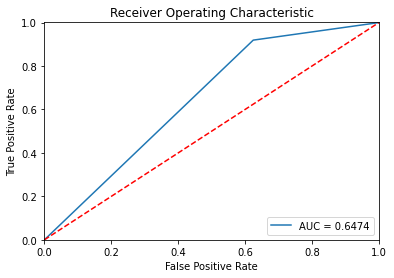

In [ ]:
# Calculate the AUC
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [ ]:
# Calculating the confidence factor
from math import sqrt
interval = 2.58 * sqrt( (accuracy * (1 - accuracy)) / y_test.shape[0])
interval

0.029047113729042257

In [ ]:
with open("trained_model.pkl", "wb") as file:
  pickle.dump(model, file)

# model.save_model('models.pkl')
# pickle.dump(model,open('models.pkl','wb'))